# Prerequisites

# class_sz

To intstall class_sz, follow carefully the instructions given in the README file of the code repository. 

In [1]:
import classy_sz
classy_sz.__file__

Metal device set to: Apple M1 Pro


2023-05-06 23:00:46.561635: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 23:00:46.561762: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

## cosmopower

To install cosmopower, visit:

https://github.com/alessiospuriomancini/cosmopower


Check cosmopower is installed:

In [3]:
import cosmopower

## cobaya

To install cobaya, visit: 

https://cobaya.readthedocs.io/en/latest/installation.html

Check cobaya is installed:

In [4]:
import cobaya

## getdist

To install getdist, visit:

https://getdist.readthedocs.io/en/latest/intro.html

Check getdist is installed


In [5]:
import getdist

## cosmopower emulators

Make a cosmopower-organtization repository to store the emulaotors. It can be wherever on your system: <br>

$ mkdir cosmopower-organtization <br>

Then clone the emulators inside it: <br>

$ cd cosmopower-organtization <br>

$ git clone https://github.com/cosmopower-organization/lcdm.git <br>

Now we need to set the path to this repository. <br>
Mine is several levels above where we are now, so: (**adapt to your needs!**)

In [6]:
import os
root_path = os.path.abspath("")
path_to_cosmopower_organization = root_path + '/../../../../../cosmopower-organization/' 

Finally, the path to the emulators is:

In [7]:
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'

Check that these paths are correctly set:

In [8]:
import subprocess
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'
str_cmd_subprocess = ["ls",path_to_emulators]
print('inside lcdm:')
print(subprocess.call(str_cmd_subprocess))



inside lcdm:
PK
PP
README.md
TTTEEE
derived-parameters
growth-and-distances
0


# Initialize

In [9]:
import numpy as np
import scipy
import yaml


from getdist import loadMCSamples, MCSamples
from getdist import plots

from cosmopower import cosmopower_NN
from cosmopower import cosmopower_PCAplusNN

import cobaya


#
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

We will save chains in the chain directory insied the repository where this notebook is

In [10]:
path_to_chains_dir = root_path + '/../chains/'

print(path_to_chains_dir)

/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/


Path to the cobaya packages, see the cobaya documentation.  (**adapt to your needs!**)

In [11]:
path_to_cobaya_packages_data = '/Users/boris/Work/CLASS-SZ/SO-SZ/cobaya_packages/data'

Load the emulators:

In [12]:
%%time
path_to_emulators = path_to_cosmopower_organization + 'lcdm/'


cp_der_nn = cosmopower_NN(restore=True,
                      restore_filename=path_to_emulators + 'derived-parameters/DER_v1',
                      )


CPU times: user 22.3 ms, sys: 23.6 ms, total: 46 ms
Wall time: 45.6 ms


# Pyactlike

## Set-up of the input file

We need to load the template and add the correct paths to the data files and where we save the chains:

In [27]:
Dict_yaml = yaml.safe_load(open('../input_files/pyactlike.yaml'))
print(Dict_yaml)

{'output': 'plikHMTTTEE', 'likelihood': {'pyactlike.ACTPol_lite_DR4': {'stop_at_error': True}}, 'theory': None, 'params': {'omega_b': {'prior': {'min': 0.01933, 'max': 0.02533}, 'ref': {'dist': 'norm', 'loc': 0.022211104, 'scale': 0.00088253849}, 'proposal': 0.00088253849, 'latex': '\\omega_\\mathrm{b}'}, 'omega_cdm': {'prior': {'min': 0.08, 'max': 0.2}, 'ref': {'dist': 'norm', 'loc': 0.12590565, 'scale': 0.012255042}, 'proposal': 0.012255042, 'latex': '\\omega_\\mathrm{cdm}'}, 'H0': {'prior': {'min': 40.0, 'max': 99.0}, 'ref': {'dist': 'norm', 'loc': 69.351243, 'scale': 2.0}, 'proposal': 2.0, 'latex': 'H_0'}, 'n_s': {'prior': {'min': 0.8812, 'max': 1.0492}, 'ref': {'dist': 'norm', 'loc': 0.95989286, 'scale': 0.019465327}, 'proposal': 0.019465327, 'latex': 'n_s'}, 'logA': {'prior': {'min': 2.5, 'max': 3.5}, 'ref': {'dist': 'norm', 'loc': 2.9939341, 'scale': 0.12892144}, 'proposal': 0.12892144, 'latex': 'ln10^{10}A_s'}, 'tau_reio': {'prior': {'dist': 'norm', 'loc': 0.065, 'scale': 0.015

In [28]:
Dict_yaml['output'] = path_to_chains_dir +'pyactlike'
Dict_yaml['sampler']['mcmc']['covmat'] = path_to_chains_dir + '../covmats/pyactlike.covmat'
Dict_yaml['sampler']['mcmc']['Rminus1_stop'] = 0.05


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['use_class_sz_fast_mode'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['ell_factor'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['stop_at_error'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['output'] = 'tCl'
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_background_and_thermo'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pkl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pknl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_hubble'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_and_der'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_at_z'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_chi'] = 1 # for this run we dont need this



with open('../input_files/pyactlike_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

## Run the chains

In [29]:
%%time
str_cmd_subprocess = ["mpirun",
                      "-np","4",
                      "cobaya-run",
                      "../input_files/pyactlike_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[0 : output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'pyactlike'
[0 : output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/pyactlike'
[0 : output] Will delete previous products ('force' was requested).
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

[0 : tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.
[1 : tensorflow] *WARN

2023-05-06 13:19:01.275304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 13:19:01.275310: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 13:19:01.275304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 13:19:01.275304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 13:19:01.275620: I tensorflow/core/common_runtime/plu

[3 : classy_szfast.classy_sz.classy_sz] Initialized!
[0 : classy_szfast.classy_sz.classy_sz] Initialized!
[1 : classy_szfast.classy_sz.classy_sz] Initialized!
[2 : classy_szfast.classy_sz.classy_sz] Initialized!
[0 : prior] *WARNING* There are unbounded parameters (['tau_reio']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[2 : mcmc] Getting initial point... (this may take a few seconds)
[3 : mcmc] Getting initial point... (this may take a few seconds)
[1 : mcmc] Getting initial point... (this may take a few seconds)
[0 : mcmc] Getting initial point... (this may take a few seconds)
[0 : model] Measuring speeds... (this may take a few seconds)
[0 : model] Setting measured speeds (per sec): {pyactlike.ACTPol_lite_DR4: 588.0, classy_szfast.classy_sz.classy_sz: 19.4}
[0 : mcmc] Initial point: H0:75.31802, logA:2.879315, n_s:0.959254, omega_b:0.02215831, omega_cdm:0.1279916, tau_reio:0.0637321, yp2:1.023866
[0 : mcmc] Oversamplin

0

# Plot with getdist

## Analyse

In [30]:
%%time
path_to_chains = []
final_chain_dir_list = []


final_chain_dir_list.append(path_to_chains_dir +'pyactlike')
path_to_chains.append(path_to_chains_dir)

current_path = os.path.abspath("")

for i in range(len(final_chain_dir_list)):
    os.chdir(path_to_chains[i])
    print('running getdist on chains ' + final_chain_dir_list[i])
    str_cmd_subprocess = ["nice","-n","19",'getdist',final_chain_dir_list[i],"--ignore_rows","0.2"]
    subprocess.call(str_cmd_subprocess)
os.chdir(current_path)

all_samples = []

i=0
readsamps = loadMCSamples(final_chain_dir_list[i],settings={'ignore_rows':0.3})
p = readsamps.getParams()
print('adding derived parameters')
params_cp = {}
params_cp['omega_b'] = p.omega_b
params_cp['omega_cdm'] = p.omega_cdm
params_cp['ln10^{10}A_s'] = p.logA
params_cp['n_s'] = p.n_s
params_cp['tau_reio'] = p.tau_reio
params_cp['H0'] = p.H0
predicted_der_params = cp_der_nn.ten_to_predictions_np(params_cp)
readsamps.addDerived(predicted_der_params[:,1],name='sigma8',label=r'\sigma_8')
readsamps.addDerived(predicted_der_params[:,0],name='theta_s_1e2',label=r'100*\theta_s')
p = readsamps.getParams()
readsamps.addDerived((p.H0/100.)**-2.*(p.omega_b+p.omega_cdm),name='Ombc',label=r'\Omega_m')

p = readsamps.getParams()
readsamps.addDerived(p.sigma8*(p.Ombc/0.3)**0.5,name='S8d5',label=r'S_8')
Fs = readsamps.getInlineLatex('S8d5',limit=1)
print('S8d5: ',Fs)
Fs = readsamps.getInlineLatex('tau_reio',limit=1)
print('tau_reio: ',Fs)
Fs = readsamps.getInlineLatex('sigma8',limit=1)
print('sigma8: ',Fs)

samples = readsamps
samples.updateBaseStatistics()
all_samples.append(samples)

running getdist on chains /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/pyactlike
producing files in directory  ./
/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/pyactlike.2.txt
/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/pyactlike.3.txt
/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/pyactlike.1.txt
/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/pyactlike.4.txt
Removed 0.2 as burn in
Number of chains used =  4
 var(mean)/mean(var), remaining chains, worst e-value: R-1 =       0.04803
RL: Thin for Markov:  26
RL: Thin for indep samples:   26
RL: Estimated burn in steps:  152  ( 63  rows)
using 9443 rows, 11 parameters; mean weight 2.4199936460870486, tot weight 22852.0
Approx indep samples (N/corr length): 562
Equiv number of single

producing files in directory  ./
Removed 0.2 as burn in
using 9443 rows, 11 parameters; mean weight 2.4199936460870486, tot weight 22852.0
Approx indep samples (N/corr length): 562
Equiv number of single samples (sum w)/max(w): 879
Effective number of weighted samples (sum w)^2/sum(w^2): 5887
Best fit sample -log(Like) = 131.668940
Ln(mean 1/like) = 140.700912
mean(-Ln(like)) = 134.934193
-Ln(mean like)  = 133.883470


S8d5:  S_8 = 0.814\pm 0.042
tau_reio:  \tau_\mathrm{reio} = 0.064\pm 0.014
sigma8:  \sigma_8 = 0.819\pm 0.016
CPU times: user 733 ms, sys: 100 ms, total: 833 ms
Wall time: 1.17 s


## Plot contours

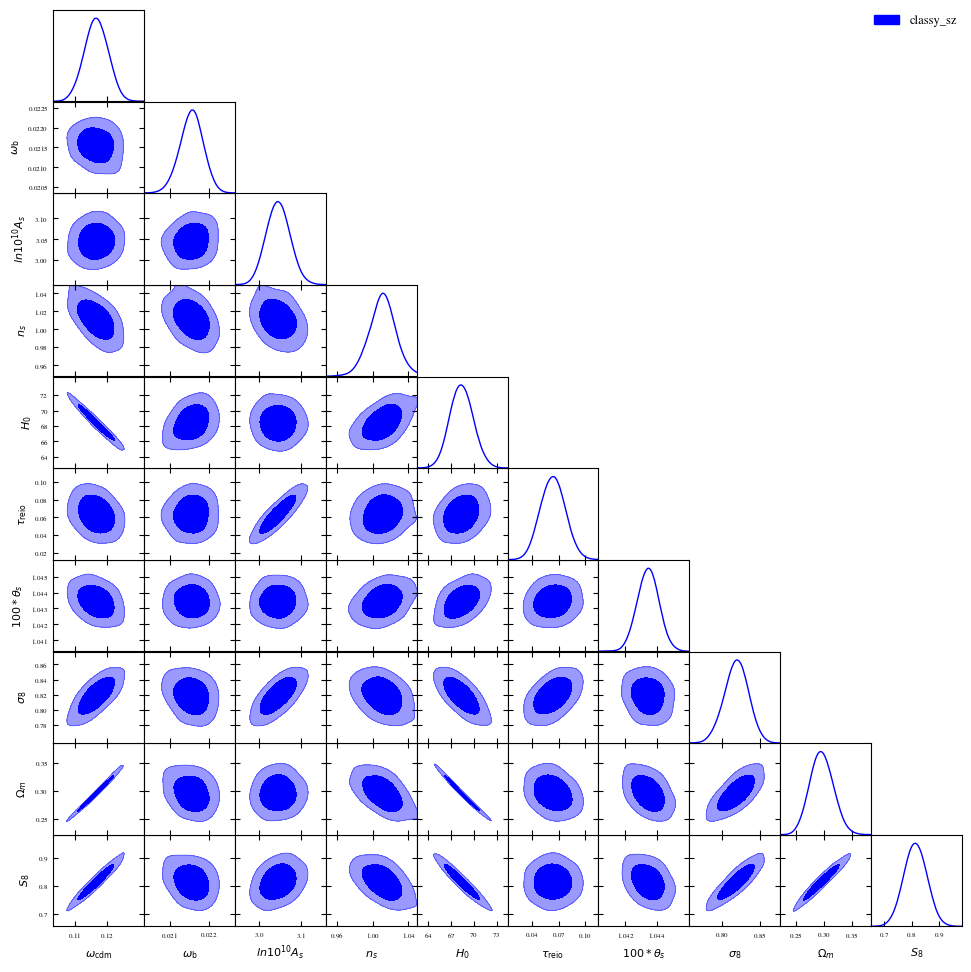

In [31]:
g = plots.getSubplotPlotter()
g.settings.fig_width_inch = 10

g.settings.axes_fontsize = 10
g.settings.lab_fontsize =13

g.settings.legend_fontsize = 14
g.settings.alpha_filled_add=0.1
g.settings.colorbar_label_pad = 20.
g.settings.figure_legend_frame = False

g.settings.title_limit=0 #uncomment if you want to display marg stats.

sample_list = []
for s in range(len(all_samples)):

    sample_list.append(all_samples[s])
    
g.triangle_plot(sample_list,
    [
    'omega_cdm',
    'omega_b',
    'logA',
    'n_s',
    'H0',
    'tau_reio',
    'theta_s_1e2',
    'sigma8',
    'Ombc',
    'S8d5',
    ],
    # param_limits={'n_s':(0.97, 1.1)},
    filled=[True,False],
    legend_labels=[ 'classy_sz'],
    legend_loc='upper right',
    colors = ['blue','red','green','red'],
    line_args=[{'lw':'1','color':'blue'},{'lw':'1','color':'red'},{'lw':'1','color':'green'},{'lw':'1','color':'r'}]
                   )


g.export(path_to_chains_dir +'pyactlike_classy_sz.pdf')

# Evaluate mode and chi2 comparison

The best-fit model from Hill, Caleberese et al (https://arxiv.org/pdf/2109.04451.pdf) has:
chi2 = 282.5

In [59]:
Dict_yaml = yaml.safe_load(open('../input_files/pyactlike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'pyactlike_evaluate'
# Dict_yaml['sampler']['mcmc']['covmat'] = path_to_chains_dir + '../covmats/pyactlike.covmat'
# Dict_yaml['sampler']['mcmc']['Rminus1_stop'] = 0.05


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['use_class_sz_fast_mode'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['ell_factor'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['stop_at_error'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['output'] = 'tCl'
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_background_and_thermo'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pkl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pknl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_hubble'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_and_der'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_at_z'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_chi'] = 1 # for this run we dont need this



Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['n_s'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['omega_b'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omega_cdm'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau_reio'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['yp2'] = 1.0009
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2

Dict_yaml['timing'] = True


with open('../input_files/pyactlike_evaluate_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [61]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/pyactlike_evaluate_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'pyactlike_evaluate'
[output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/pyactlike_evaluate'
[output] Will delete previous products ('force' was requested).
Metal device set to: Apple M1 Pro
[tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.


2023-05-06 13:47:07.952267: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 13:47:07.952414: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[classy_szfast.classy_sz.classy_sz] Initialized!
[prior] *WARNING* There are unbounded parameters (['tau_reio']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   H0 = 68.2
   logA = 3.043
   n_s = 1.013
   omega_b = 0.02149
   omega_cdm = 0.117
   tau_reio = 0.063
   yp2 = 1.0009
[evaluate] Evaluating prior and likelihoods...
[evaluate] log-posterior  = -131.544
[evaluate] log-prior      = 9.82383
[evaluate]    logprior_0 = 9.82383
[evaluate] log-likelihood = -141.368
[evaluate]    chi2_pyactlike.ACTPol_lite_DR4 = 282.736
[evaluate] Derived params:
[pyactlike.actpol_lite_dr4] Average evaluation time for pyactlike.ACTPol_lite_DR4: 0.00131746 s  (1 evaluations)
[classy_szfast.classy_sz.classy_sz] Average evaluation time for classy_szfast.classy_sz.classy_sz: 0.023002 s  (1 evaluations)

systemMemory: 16.00 GB
maxCac

0

## Comparison with camb and class

### class ultra high accuracy

In [13]:
Dict_yaml = yaml.safe_load(open('../input_files/pyactlike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'pyactlike_class-uha_evaluate'
# Dict_yaml['sampler']['mcmc']['covmat'] = path_to_chains_dir + '../covmats/pyactlike.covmat'
# Dict_yaml['sampler']['mcmc']['Rminus1_stop'] = 0.05


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['use_class_sz_fast_mode'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['ell_factor'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['stop_at_error'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['output'] = 'tCl'
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_background_and_thermo'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pkl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pknl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_hubble'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_and_der'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_at_z'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_chi'] = 1 # for this run we dont need this

Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['use_cmb_cls_from_file'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['cmb_cls_filename'] = '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/class_uha_6may23_edeppaper_lcdmbf.pickle'


Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['n_s'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['omega_b'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omega_cdm'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau_reio'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['yp2'] = 1.0009
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2

Dict_yaml['timing'] = True


with open('../input_files/pyactlike_class-uha_evaluate_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [14]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/pyactlike_class-uha_evaluate_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'pyactlike_class-uha_evaluate'
Metal device set to: Apple M1 Pro
[tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.


2023-05-06 23:01:16.195794: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 23:01:16.195918: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[classy_szfast.classy_sz.classy_sz] Initialized!
[prior] *WARNING* There are unbounded parameters (['tau_reio']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   H0 = 68.2
   logA = 3.043
   n_s = 1.013
   omega_b = 0.02149
   omega_cdm = 0.117
   tau_reio = 0.063
   yp2 = 1.0009
[evaluate] Evaluating prior and likelihoods...
[evaluate] log-posterior  = -131.448
[evaluate] log-prior      = 9.82383
[evaluate]    logprior_0 = 9.82383
[evaluate] log-likelihood = -141.272
[evaluate]    chi2_pyactlike.ACTPol_lite_DR4 = 282.543
[evaluate] Derived params:
[pyactlike.actpol_lite_dr4] Average evaluation time for pyactlike.ACTPol_lite_DR4: 0.001928 s  (1 evaluations)
[classy_szfast.classy_sz.classy_sz] Average evaluation time for classy_szfast.classy_sz.classy_sz: 0.00178054 s  (1 evaluations)

systemMemory: 16.00 GB
maxCac

0

### camb

In [83]:
Dict_yaml = yaml.safe_load(open('../input_files/pyactlike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'pyactlike_evaluate_camb'
# Dict_yaml['sampler']['mcmc']['covmat'] = path_to_chains_dir + '../covmats/pyactlike.covmat'
# Dict_yaml['sampler']['mcmc']['Rminus1_stop'] = 0.05


Dict_yaml['theory'] = {}
Dict_yaml['theory']['camb'] = {}
Dict_yaml['theory']['camb']['extra_args'] ={ 
    'lens_potential_accuracy': 8,
    'mnu': 0.06,
    'nonlinear': True,
    'HMCode_A_baryon': 3.13,
    'HMCode_eta_baryon': 0.603,
    'halofit_version': 'mead2016',
    'HMCode_logT_AGN': 7.8,
    'kmax': 10.,
    'k_per_logint': 130,
    'accurate_massive_neutrino_transfers': True,
    'lens_margin': 2050,
    'lAccuracyBoost': 2.0,
    'AccuracyBoost': 2.0,
    'lSampleBoost': 2.0,
    'DoLateRadTruncation': False
}

Dict_yaml['params']['ombh2'] = Dict_yaml['params'].pop('omega_b')
Dict_yaml['params']['omch2'] = Dict_yaml['params'].pop('omega_cdm')
Dict_yaml['params']['ns'] = Dict_yaml['params'].pop('n_s')
Dict_yaml['params']['tau'] = Dict_yaml['params'].pop('tau_reio')

Dict_yaml['params']['As'] = {
  'value': "lambda logA: 1e-10 * np.exp(logA)",
  'latex': 'A_s'
}

Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['ns'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['ombh2'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omch2'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['yp2'] = 1.0009
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2

Dict_yaml['timing'] = True


with open('../input_files/pyactlike_evaluate_camb_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [84]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/pyactlike_evaluate_camb_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'pyactlike_evaluate_camb'
[output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/pyactlike_evaluate_camb'
[output] Will delete previous products ('force' was requested).
[camb] `camb` module loaded successfully from /Users/boris/Work/CLASS-SZ/SO-SZ/cobaya_packages/code/CAMB/camb
[prior] *WARNING* There are unbounded parameters (['tau']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   H0 = 68.2
   logA = 3.043
   ns = 1.013
   ombh2 = 0.02149
   omch2 = 0.117
   tau = 0.063
   yp2 = 1.0009
[evaluate] Evaluating prior and likelihoods...
[eval

0

### class v2.9.4

In [85]:
Dict_yaml = yaml.safe_load(open('../input_files/pyactlike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'pyactlike_evaluate_classv294'
# Dict_yaml['sampler']['mcmc']['covmat'] = path_to_chains_dir + '../covmats/pyactlike.covmat'
# Dict_yaml['sampler']['mcmc']['Rminus1_stop'] = 0.05


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['ignore_obsolete'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] ={ 
    'output': 'tCl',
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'c_min': 3.13,
    'eta_0': 0.603,
    'l_max_scalars': 11000,
    'm_ncdm': 0.06,
    'non_linear': 'hmcode',
    # the three high-precision paramaters:
    'k_max_tau0_over_l_max': 15.0,
    'accurate_lensing': 1,
    'perturb_sampling_stepsize': 0.05
}



Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['n_s'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['omega_b'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omega_cdm'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau_reio'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['yp2'] = 1.0009
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2

Dict_yaml['timing'] = True


with open('../input_files/pyactlike_evaluate_classv294_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [86]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/pyactlike_evaluate_classv294_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'pyactlike_evaluate_classv294'
Metal device set to: Apple M1 Pro
[tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.


2023-05-06 14:40:05.717234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 14:40:05.717526: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[classy_szfast.classy_sz.classy_sz] Initialized!
[prior] *WARNING* There are unbounded parameters (['tau_reio']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   H0 = 68.2
   logA = 3.043
   n_s = 1.013
   omega_b = 0.02149
   omega_cdm = 0.117
   tau_reio = 0.063
   yp2 = 1.0009
[evaluate] Evaluating prior and likelihoods...
[evaluate] log-posterior  = -131.53
[evaluate] log-prior      = 9.82383
[evaluate]    logprior_0 = 9.82383
[evaluate] log-likelihood = -141.354
[evaluate]    chi2_pyactlike.ACTPol_lite_DR4 = 282.709
[evaluate] Derived params:
[pyactlike.actpol_lite_dr4] Average evaluation time for pyactlike.ACTPol_lite_DR4: 0.0337631 s  (1 evaluations)
[classy_szfast.classy_sz.classy_sz] Average evaluation time for classy_szfast.classy_sz.classy_sz: 126.203 s  (1 evaluations)

systemMemory: 16.00 GB
maxCacheS

0

### class v3

In [36]:
Dict_yaml = yaml.safe_load(open('../input_files/pyactlike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'pyactlike_evaluate_classv3'



Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy'] = {}
Dict_yaml['theory']['classy']['extra_args'] ={ 
    'output': 'tCl',
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'c_min': 3.13,
    'eta_0': 0.603,
    'l_max_scalars': 11000,
    'm_ncdm': 0.06,
    'non_linear': 'hmcode',
    # the three high-precision paramaters:
    'k_max_tau0_over_l_max': 15.0,
    'accurate_lensing': 1,
    'perturbations_sampling_stepsize': 0.05,
    'recombination': 'RECFAST',
}

Dict_yaml['params']['logA']['drop'] = True
Dict_yaml['params']['A_s'] = {
  'value': "lambda logA: 1e-10 * np.exp(logA)",
  'latex': 'A_s'
}

Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['n_s'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['omega_b'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omega_cdm'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau_reio'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['yp2'] = 1.0009
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2

Dict_yaml['timing'] = True


with open('../input_files/pyactlike_evaluate_classv3_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [37]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/pyactlike_evaluate_classv3_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'pyactlike_evaluate_classv3'
[output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/pyactlike_evaluate_classv3'
[output] Will delete previous products ('force' was requested).
[classy] `classy` module loaded successfully from /Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy-3.2.0-py3.9-macosx-11.0-arm64.egg
[prior] *WARNING* There are unbounded parameters (['tau_reio']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   H0 = 68.2
   logA = 3.043
   n_s = 1.013
   omega_b = 0.02149
   omega_cdm = 0.117
   tau_reio = 0.063
   yp2 =

0

### class v3 - hyrec

In [38]:
Dict_yaml = yaml.safe_load(open('../input_files/pyactlike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'pyactlike_evaluate_classv3-hyrec'



Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy'] = {}
Dict_yaml['theory']['classy']['extra_args'] ={ 
    'output': 'tCl',
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'c_min': 3.13,
    'eta_0': 0.603,
    'l_max_scalars': 11000,
    'm_ncdm': 0.06,
    'non_linear': 'hmcode',
    # the three high-precision paramaters:
    'k_max_tau0_over_l_max': 15.0,
    'accurate_lensing': 1,
    'perturbations_sampling_stepsize': 0.05,
    'recombination': 'HYREC',
}

Dict_yaml['params']['logA']['drop'] = True
Dict_yaml['params']['A_s'] = {
  'value': "lambda logA: 1e-10 * np.exp(logA)",
  'latex': 'A_s'
}

Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['evaluate'] = {}
Dict_yaml['sampler']['evaluate']['override'] = {}
Dict_yaml['sampler']['evaluate']['override']['logA'] = 3.043
Dict_yaml['sampler']['evaluate']['override']['n_s'] = 1.013
Dict_yaml['sampler']['evaluate']['override']['omega_b'] = 0.02149
Dict_yaml['sampler']['evaluate']['override']['omega_cdm'] = 0.1170
Dict_yaml['sampler']['evaluate']['override']['tau_reio'] = 0.063
Dict_yaml['sampler']['evaluate']['override']['yp2'] = 1.0009
Dict_yaml['sampler']['evaluate']['override']['H0'] = 68.2

Dict_yaml['timing'] = True


with open('../input_files/pyactlike_evaluate_classv3-hyrec_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [39]:
%%time
str_cmd_subprocess = ["cobaya-run",
                      "../input_files/pyactlike_evaluate_classv3-hyrec_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'pyactlike_evaluate_classv3-hyrec'
[classy] `classy` module loaded successfully from /Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy-3.2.0-py3.9-macosx-11.0-arm64.egg
[prior] *WARNING* There are unbounded parameters (['tau_reio']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[evaluate] Initialized!
[evaluate] Looking for a reference point with non-zero prior.
[evaluate] Reference point:
   H0 = 68.2
   logA = 3.043
   n_s = 1.013
   omega_b = 0.02149
   omega_cdm = 0.117
   tau_reio = 0.063
   yp2 = 1.0009
[evaluate] Evaluating prior and likelihoods...
[evaluate] log-posterior  = -131.474
[evaluate] log-prior      = 9.82383
[evaluate]    logprior_0 = 9.82383
[evaluate] log-likelihood = -141.297
[evaluate]    chi2_pyactlike.ACTPol_lite_DR4 = 282.595

0

# Minimizer run

In [65]:
Dict_yaml = yaml.safe_load(open('../input_files/pyactlike.yaml'))

Dict_yaml['output'] = path_to_chains_dir +'pyactlike_minimize'


Dict_yaml['theory'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['use_class_sz_fast_mode'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['ell_factor'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['stop_at_error'] = True
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args'] = {}
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['output'] = 'tCl'
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_background_and_thermo'] = 1
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pkl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_pknl'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_hubble'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_and_der'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_sigma8_at_z'] = 1 # for this run we dont need this
Dict_yaml['theory']['classy_szfast.classy_sz.classy_sz']['extra_args']['skip_chi'] = 1 # for this run we dont need this



Dict_yaml['sampler'].pop('mcmc')
Dict_yaml['sampler']['minimize'] = {}
Dict_yaml['sampler']['minimize']['method'] = 'bobyqa'
Dict_yaml['sampler']['minimize']['ignore_prior'] = False 
Dict_yaml['sampler']['minimize']['max_evals'] = 1e6
Dict_yaml['sampler']['minimize']['confidence_for_unbounded'] = 0.9999995
Dict_yaml['sampler']['minimize']['override_scipy'] = 'null' 
Dict_yaml['sampler']['minimize']['override_bobyqa'] = {}
Dict_yaml['sampler']['minimize']['override_bobyqa']['rhoend'] = 0.01
Dict_yaml['sampler']['minimize']['covmat'] = path_to_chains_dir + '../covmats/pyactlike.covmat'


Dict_yaml['timing'] = True


with open('../input_files/pyactlike_minimize_system.yaml', 'w') as outfile:
    yaml.dump(Dict_yaml, outfile, default_flow_style=False)

In [66]:
%%time
str_cmd_subprocess = ["mpirun",
                      "-np",
                      "4",
                      "cobaya-run",
                      "../input_files/pyactlike_minimize_system.yaml",
                      "-f"]
subprocess.call(str_cmd_subprocess)

[0 : output] Output to be read-from/written-into folder '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains', with prefix 'pyactlike_minimize'
[0 : output] Found existing info files with the requested output prefix: '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_organization/notebooks/mcmcs/cobaya/notebooks/../chains/pyactlike_minimize'
[0 : output] Will delete previous products ('force' was requested).
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

[2 : tensorflow] *WARNING* Please fix your imports. Module tensorflow.python.training.tracking.data_structures has been moved to tensorflow.python.trackable.data_structures. The old module will be deleted in version 2.11.
[3 :

2023-05-06 14:07:03.011755: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 14:07:03.011754: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 14:07:03.011754: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-06 14:07:03.011892: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-05-06 14:07:03

[1 : classy_szfast.classy_sz.classy_sz] Initialized!
[3 : classy_szfast.classy_sz.classy_sz] Initialized!
[0 : classy_szfast.classy_sz.classy_sz] Initialized!
[2 : classy_szfast.classy_sz.classy_sz] Initialized!
[0 : minimize] Initializing
[3 : minimize] Run 1/1 will start from random initial point:
[3 : minimize] {'H0': 66.90751028029257, 'logA': 2.9611531122874637, 'n_s': 0.9623440256182451, 'omega_b': 0.022130996815876568, 'omega_cdm': 0.12538434202229737, 'tau_reio': 0.06221564544903177, 'yp2': 1.0145314556434715}
[0 : minimize] Run 1/1 will start from random initial point:
[0 : minimize] {'H0': 69.90541259902739, 'logA': 2.942583895694992, 'n_s': 0.9722319635296882, 'omega_b': 0.021839128496534937, 'omega_cdm': 0.1463040092099478, 'tau_reio': 0.0631002320727759, 'yp2': 1.009166942646489}
[0 : prior] *WARNING* There are unbounded parameters (['tau_reio']). Prior bounds are given at 0.9999995 confidence level. Beware of likelihood modes at the edge of the prior
[0 : minimize] Covari

0